## Import library and dataset

In [ ]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.api as sm
import sklearn

from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from scipy import stats
from scipy.stats import chi2_contingency
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

warnings.filterwarnings("ignore")
sns.set_style("whitegrid")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks')

## I.1. General exploration

In [ ]:
#import dataset
fkrtl_df = pd.read_csv('DM_FKRTL_2021.csv')

# info of each of the variables in our train set
fkrtl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686344 entries, 0 to 686343
Data columns (total 45 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   PSTV01  686344 non-null  int64  
 1   PSTV15  686344 non-null  float64
 2   FKL02   686344 non-null  object 
 3   FKL03   686344 non-null  object 
 4   FKL04   686344 non-null  object 
 5   FKL05   686344 non-null  object 
 6   FKL06   686344 non-null  object 
 7   FKL08   686344 non-null  object 
 8   FKL12   686344 non-null  object 
 9   FKL13   686344 non-null  object 
 10  FKL14   686344 non-null  object 
 11  FKL15   686344 non-null  object 
 12  FKL15A  686344 non-null  object 
 13  FKL16   686344 non-null  object 
 14  FKL16A  686344 non-null  object 
 15  FKL17   686344 non-null  object 
 16  FKL17A  686344 non-null  object 
 17  FKL18   686344 non-null  object 
 18  FKL18A  686344 non-null  object 
 19  FKL24   686344 non-null  object 
 20  FKL24A  686344 non-null  object 
 21  FKL24B  68

## I.2 Numerical Features

### I.2.1. Explore and clean Numerical features

In [ ]:
# Save the list of 'PSTV01' before dropping it from the numerical set
Id_list = fkrtl_df["PSTV01"].tolist()
fkrtl_df.drop(["PSTV01"], axis=1, inplace=True)

In [ ]:
# Let's select the columns of the train set with numerical data
fkrtl_num = fkrtl_df.select_dtypes(exclude=["object"])
fkrtl_num.head()

,PSTV15,FKL32,FKL47,FKL48,PSTV16,PSTV18,Age
0,12.57,825500.0,825500.0,825500.0,2021.0,2021.0,50
1,11.80,879100.0,879100.0,879100.0,2021.0,NaN,49
2,6.45,786200.0,786200.0,786200.0,2021.0,NaN,52
3,12.34,786200.0,786200.0,786200.0,2021.0,2021.0,64
4,4.33,793300.0,793300.0,793300.0,2021.0,NaN,53


In [ ]:
# move FKL48 to the end because it is the target
column_to_move = fkrtl_num.pop('FKL48')

# Rearrange the columns as desired
fkrtl_num.insert(6, 'FKL48', column_to_move)

In [ ]:
# Let's drop quasi-constant features where 95% of the values are similar or constant
sel = VarianceThreshold(threshold=0.05) # 0.05: drop column where 95% of the values are constant

# fit finds the features with constant variance
sel.fit(fkrtl_num.iloc[:, :-1])


# Get the number of features that are not constant
print(f"Number of retained features: {sum(sel.get_support())}")
print(
    f"\nNumber of quasi_constant features: {len(fkrtl_num.iloc[:, :-1].columns) - sum(sel.get_support())}")

quasi_constant_features_list = [x for x in fkrtl_num.iloc[:, :-
                                                             1].columns if x not in fkrtl_num.iloc[:, :-1].columns[sel.get_support()]]

print(
    f"\nQuasi-constant features to be dropped: {quasi_constant_features_list}")


# Let's drop these columns from df_train_num
fkrtl_num.drop(quasi_constant_features_list, axis=1, inplace=True)

Number of retained features: 4

Number of quasi_constant features: 2

Quasi-constant features to be dropped: ['PSTV16', 'PSTV18']


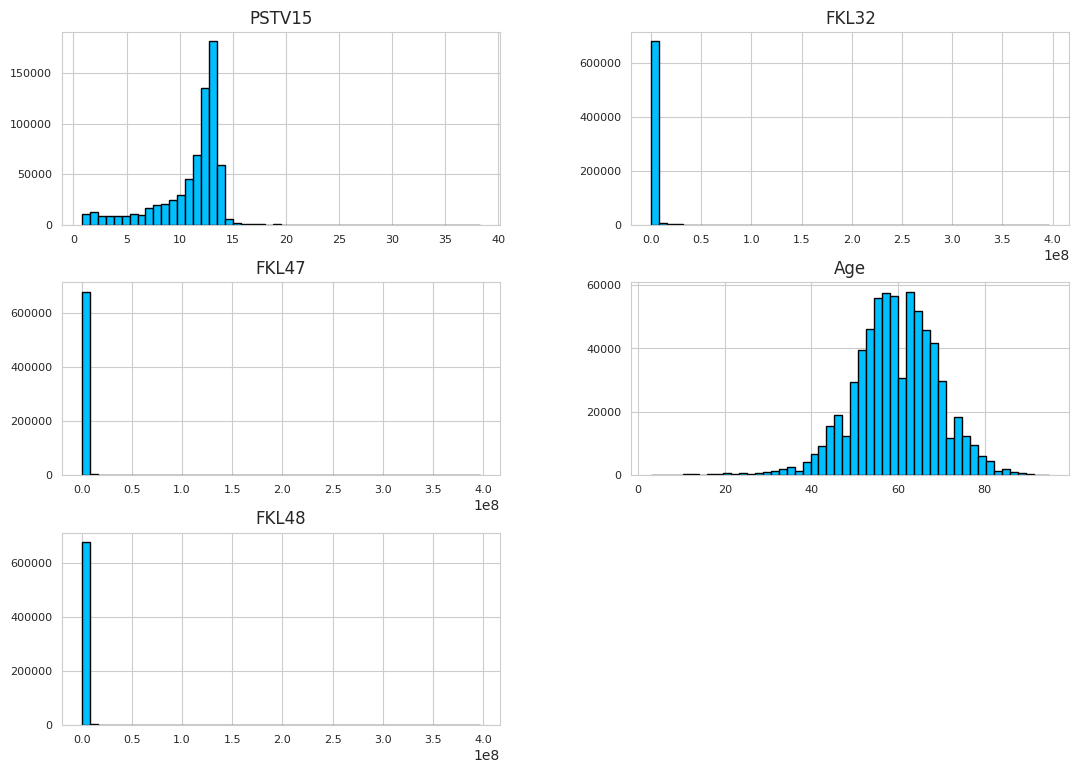

In [ ]:
# Plot the distribution of all the numerical data
fig_ = fkrtl_num.hist(bins=50, color="deepskyblue",
                         edgecolor="black", xlabelsize=8, ylabelsize=8, figsize=(13,9))

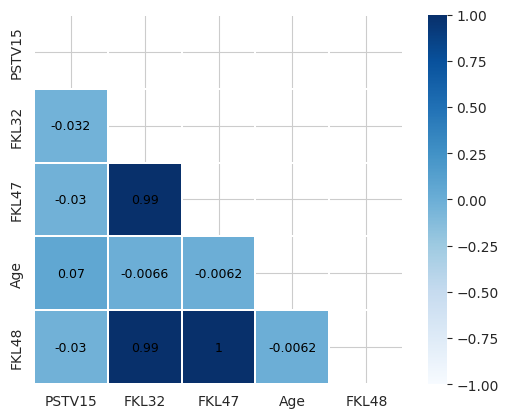

In [ ]:
# Heatmap for all the remaining numerical data including the taget 'FKL48'

# Define the heatmap parameters
pd.options.display.float_format = "{:,.2f}".format

# Define correlation matrix
corr_matrix = fkrtl_num.corr()

# Mask the upper part of the heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Choose the color map
cmap = "Blues"

# plot the heatmap
sns.heatmap(corr_matrix, mask=mask, vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot_kws={"size": 9, "color": "black"}, square=True, cmap=cmap, annot=True)
plt.show()

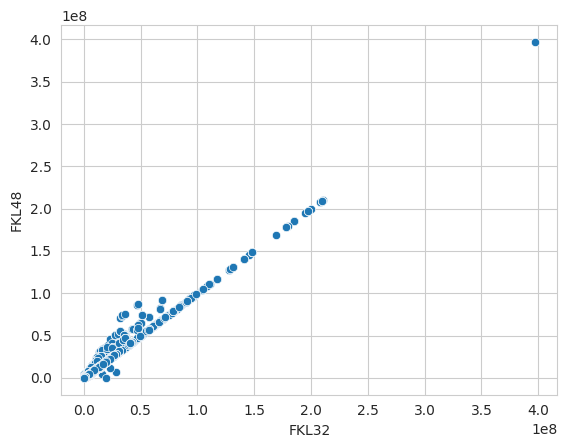

In [ ]:
sns.scatterplot(x="FKL32", y="FKL48", data=fkrtl_num)
plt.show()

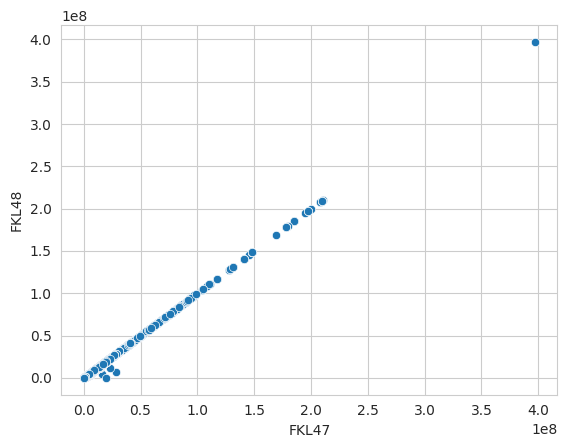

In [ ]:
sns.scatterplot(x="FKL47", y="FKL48", data=fkrtl_num)
plt.show()

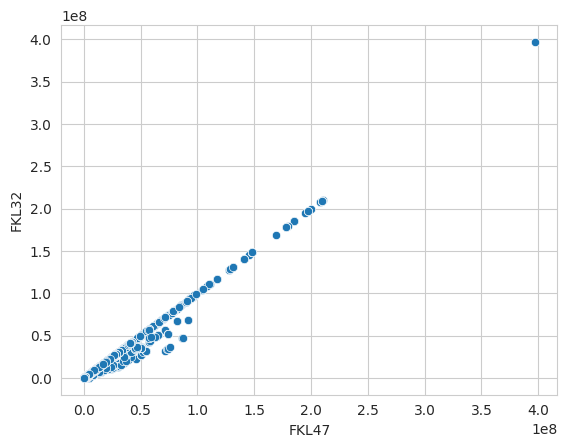

In [ ]:
sns.scatterplot(x="FKL47", y="FKL32", data=fkrtl_num)
plt.show()

In [ ]:
fkrtl_num.drop(columns=['FKL47','FKL32'], axis=1, inplace=True)
fkrtl_num.head()

,PSTV15,Age,FKL48
0,12.57,50,"825,500.00"
1,11.80,49,"879,100.00"
2,6.45,52,"786,200.00"
3,12.34,64,"786,200.00"
4,4.33,53,"793,300.00"


## I.3 Categorical Features

### I.3.1. Explore and clean Categorical features

In [ ]:
# Categorical to Quantitative relationship
categorical_features = [
    i for i in fkrtl_df.columns if fkrtl_df.dtypes[i] == "object"]
categorical_features.append("FKL48")

fkrtl_cat = fkrtl_df[categorical_features]
fkrtl_cat.head()

,FKL02,FKL03,FKL04,FKL05,FKL06,FKL08,FKL12,FKL13,FKL14,FKL15,...,PSTV05,PSTV07,PSTV08,PSTV09,PSTV10,PSTV12,PSTV13,PSTV14,PSTV17,FKL48
0,101860121V000014,2021-01-01,2021-01-01,JAWA BARAT,KOTA BEKASI,Rumah sakit,PBPU,Kelas 3,Sehat,N18 Chronic kidney disease,...,LAKI-LAKI,KELAS III,PBPU,JAWA BARAT,KOTA BEKASI,PUSKESMAS,JAWA BARAT,KOTA BEKASI,MENINGGAL,"825,500.00"
1,102090121V000046,2021-01-01,2021-01-01,BANTEN,SERANG,Rumah sakit,PBPU,Kelas 3,Sehat,N18 Chronic kidney disease,...,PEREMPUAN,KELAS III,PBPU,BANTEN,SERANG,PUSKESMAS,BANTEN,SERANG,AKTIF,"879,100.00"
2,104770121V000001,2021-01-01,2021-01-01,JAWA TENGAH,BOYOLALI,Rumah sakit,PBPU,Kelas 3,Sehat,N18 Chronic kidney disease,...,LAKI-LAKI,KELAS II,PBPU,JAWA TENGAH,BOYOLALI,PUSKESMAS,JAWA TENGAH,BOYOLALI,AKTIF,"786,200.00"
3,104770121V000040,2021-01-01,2021-01-01,JAWA TENGAH,BOYOLALI,Rumah sakit,PBPU,Kelas 3,Sehat,N18 Chronic kidney disease,...,LAKI-LAKI,KELAS III,PBPU,JAWA TENGAH,BOYOLALI,DOKTER UMUM,JAWA TENGAH,KLATEN,MENINGGAL,"786,200.00"
4,106400121V000003,2021-01-01,2021-01-01,LAMPUNG,LAMPUNG BARAT,Rumah sakit,PPU,Kelas 3,Sehat,N18 Chronic kidney disease,...,PEREMPUAN,KELAS I,PPU,LAMPUNG,PESISIR BARAT,DOKTER UMUM,LAMPUNG,PESISIR BARAT,AKTIF,"793,300.00"


In [ ]:
# Function to calculate the percentage of unique values in each column
def calculate_unique_percentage(dataframe):
    unique_percentage = {}
    total_rows = len(dataframe)
    for column in dataframe.columns:
        unique_values = dataframe[column].nunique()
        percentage = (unique_values / total_rows) * 100
        unique_percentage[column] = percentage
    return unique_percentage

# Calculate the percentage of unique values in each column
unique_percentage_result = calculate_unique_percentage(fkrtl_cat.iloc[:, :-1])

print("Percentage of unique values in each column:")
for column, percentage in unique_percentage_result.items():
    print(f"{column}: {percentage:.2f}%")

Percentage of unique values in each column:
FKL02: 67.06%
FKL03: 0.05%
FKL04: 0.06%
FKL05: 0.00%
FKL06: 0.07%
FKL08: 0.00%
FKL12: 0.00%
FKL13: 0.00%
FKL14: 0.00%
FKL15: 0.14%
FKL15A: 0.14%
FKL16: 0.41%
FKL16A: 0.41%
FKL17: 0.09%
FKL17A: 0.09%
FKL18: 0.23%
FKL18A: 0.23%
FKL24: 0.39%
FKL24A: 0.14%
FKL24B: 0.14%
FKL25: 0.01%
FKL26: 0.07%
FKL27: 0.00%
FKL28: 0.00%
FKL29: 0.00%
FKL30: 1.43%
FKL31: 0.00%
PSTV03: 2.07%
PSTV05: 0.00%
PSTV07: 0.00%
PSTV08: 0.00%
PSTV09: 0.01%
PSTV10: 0.07%
PSTV12: 0.00%
PSTV13: 0.00%
PSTV14: 0.07%
PSTV17: 0.00%


In [ ]:
# Function to drop columns with more than 15 unique values and create a new DataFrame
def drop_and_create_unique_value_dataframe(dataframe, threshold):
    unique_value_columns = []
    for column in dataframe.columns:
        unique_ratio = dataframe[column].nunique()
        if unique_ratio > threshold:
            unique_value_columns.append(column)
    new_dataframe = dataframe.drop(columns=unique_value_columns)
    unique_values = pd.concat([dataframe[col] for col in unique_value_columns], axis=1)
    return new_dataframe, unique_values

# Drop columns with more than 15 unique values and create a new DataFrame
fkrtl_filtered, unique_value_df = drop_and_create_unique_value_dataframe(fkrtl_cat.iloc[:, :-1], 15)

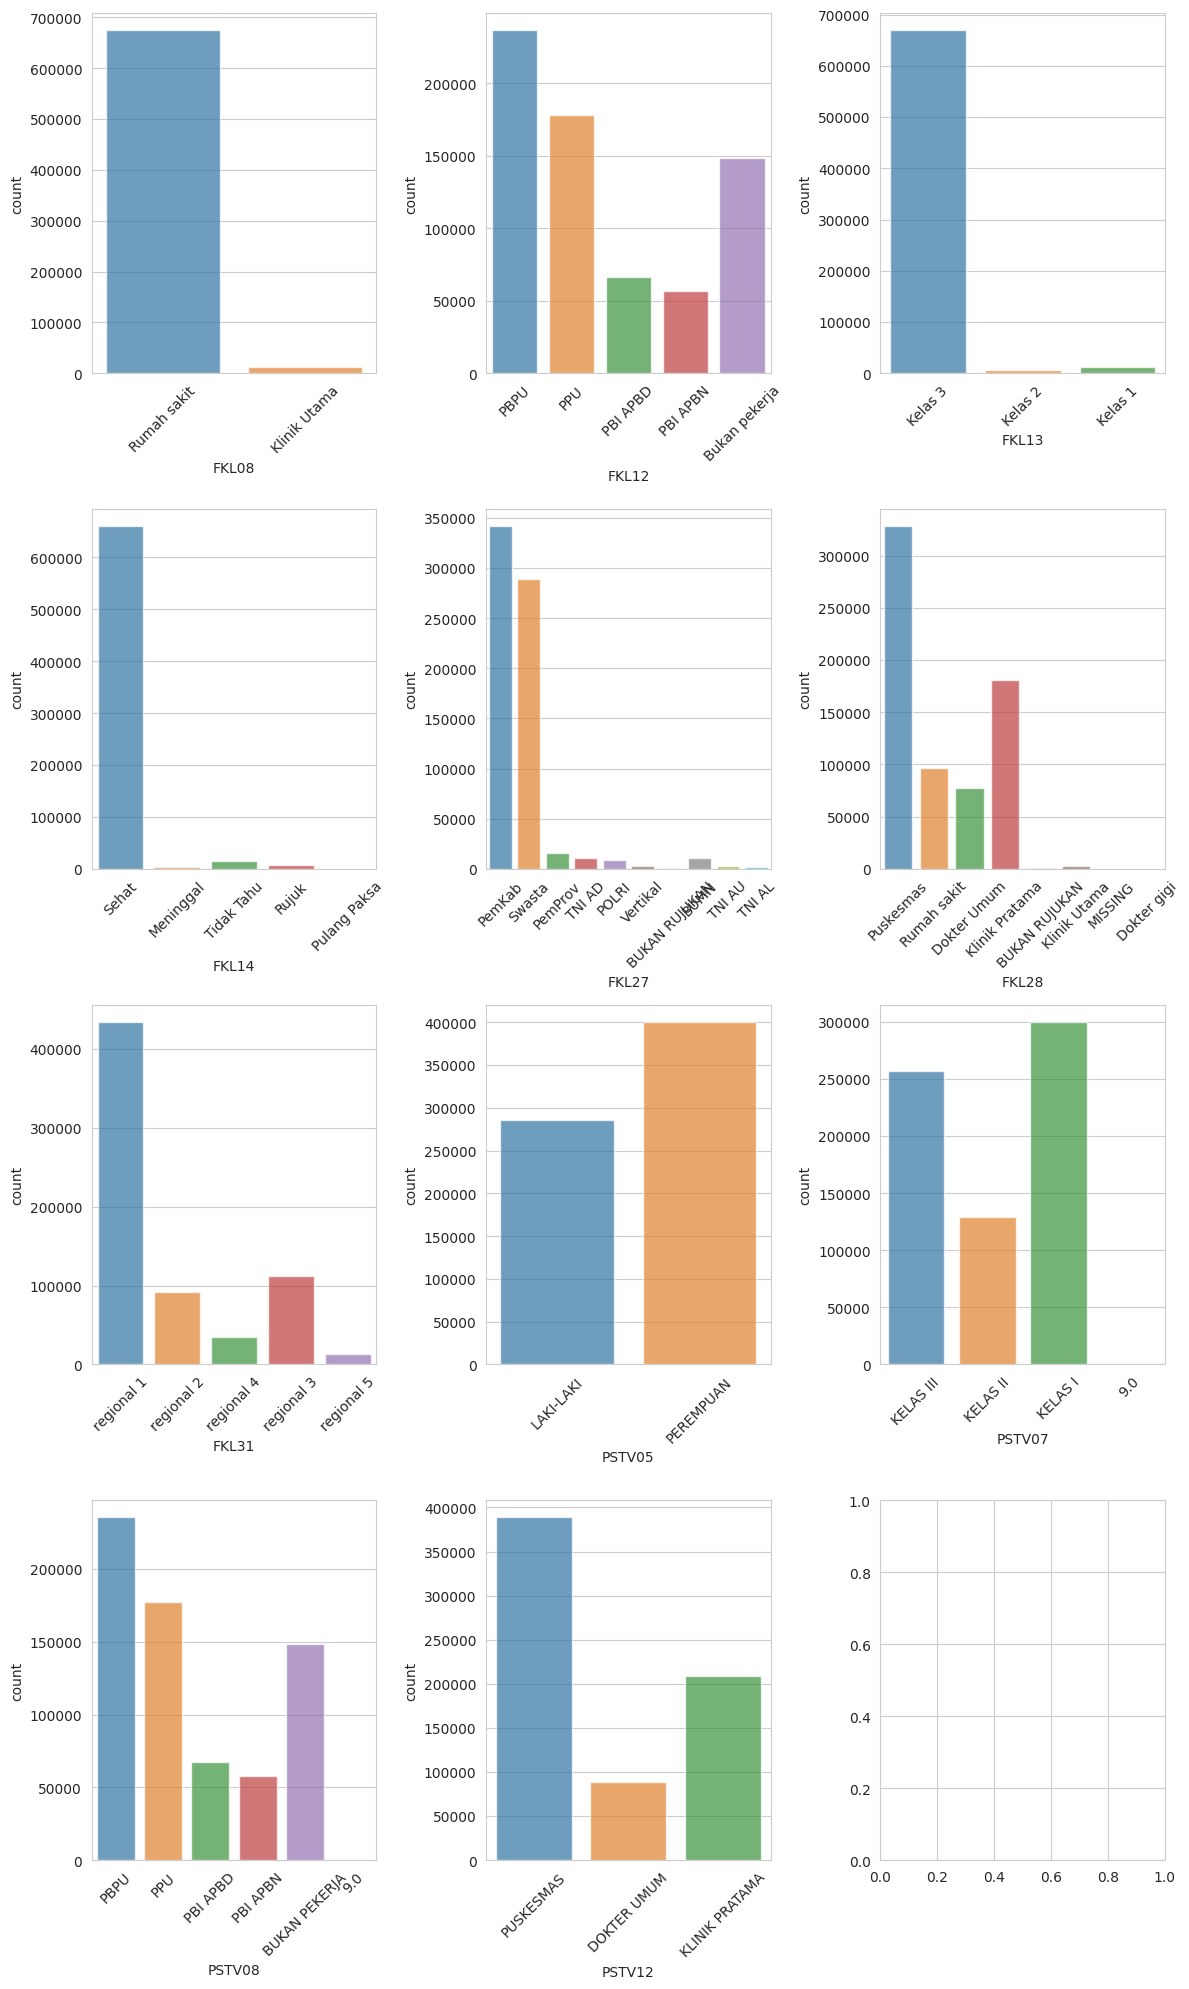

In [ ]:
# Countplot for each of the categorical features in the train set
fig, axes = plt.subplots(
    round(len(fkrtl_filtered.columns) / 3), 3, figsize=(12, 20))

for i, ax in enumerate(fig.axes):
    # plot barplot of each feature
    if i < len(fkrtl_filtered.columns) - 1:
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(
            x=fkrtl_filtered.columns[i], alpha=0.7, data=fkrtl_filtered, ax=ax)

fig.tight_layout()

In [ ]:
fkrtl_filtered.insert(12, 'FKL48', fkrtl_cat[['FKL48']])

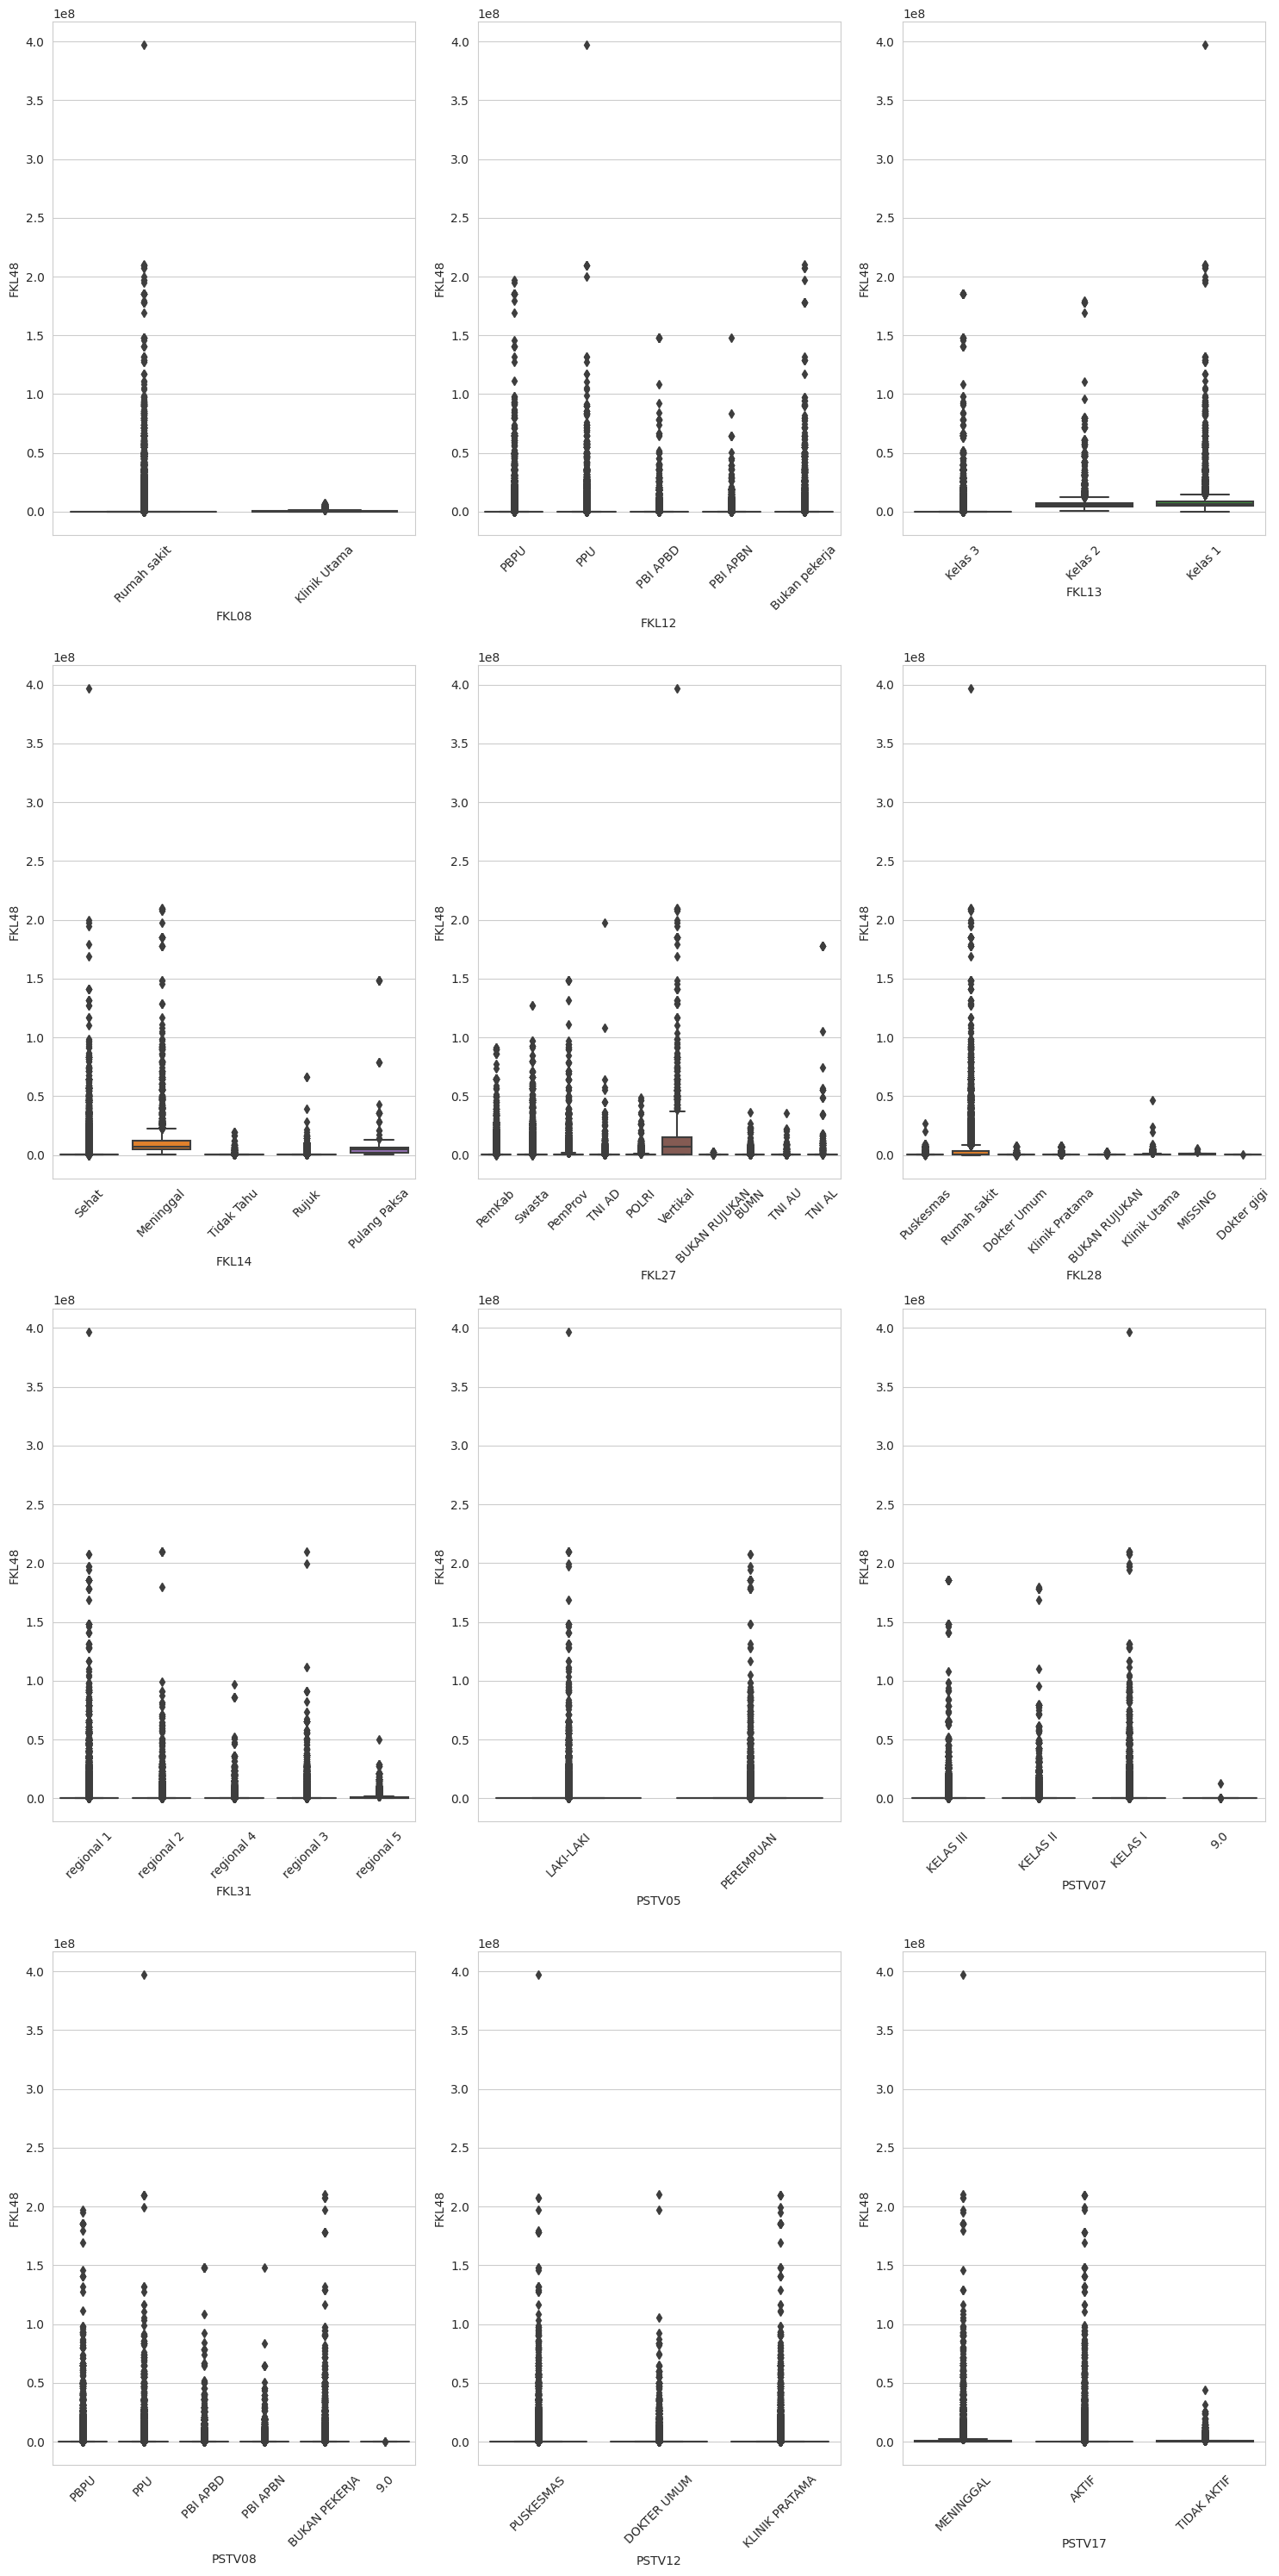

In [ ]:
# With the boxplot we can see the variation of the target 'SalePrice' in each of the categorical features
fig, axes = plt.subplots(
    round(len(fkrtl_filtered.columns)/3), 3, figsize=(15, 30))

for i, ax in enumerate(fig.axes):
    # plot the variation of SalePrice in each feature
    if i < len(fkrtl_filtered.columns) - 1:
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.boxplot(
            x=fkrtl_filtered.columns[i], y="FKL48", data=fkrtl_filtered, ax=ax)

fig.tight_layout()

In [ ]:
#split day, month, and year in datetime features
fkrtl_datetime = unique_value_df[['FKL03','FKL04','PSTV03']]

# Convert the 'timestamp_column' to datetime format
timestamp_col = ['FKL03','FKL04','PSTV03']

for col in timestamp_col:
  fkrtl_datetime[col] = pd.to_datetime(fkrtl_datetime[col])

# Extract day, month, and year into separate columns
for col in timestamp_col:
  fkrtl_datetime[col+'_day'] = fkrtl_datetime[col].dt.day
  fkrtl_datetime[col+'_month'] = fkrtl_datetime[col].dt.month
  fkrtl_datetime[col+'_year'] = fkrtl_datetime[col].dt.year

#drop timestamp_col from fkrtl_datetime
fkrtl_datetime.drop(timestamp_col, axis=1, inplace=True)

### I.3.2 Transform categorical features


In [ ]:
#drop ['FKL02','FKL03','FKL04','PSTV03','PSTV09','PSTV13'] from unique_value_df
unique_value_df.drop(['FKL02','FKL03','FKL04','PSTV03','PSTV09','PSTV13','FKL25'], axis=1, inplace=True)

#drop FKL48 from fkrtl_filtered
fkrtl_filtered.drop('FKL48', axis=1, inplace=True)

#merge unique_value_df with fkrtl_filtered
fkrtl_cat_new = fkrtl_filtered.join(unique_value_df)

In [ ]:
# Function to calculate the percentage of unique values in each column
def calculate_nunique(dataframe):
    unique_percentage = {}
    total_rows = len(dataframe)
    for column in dataframe.columns:
        unique_values = dataframe[column].nunique()
        unique_percentage[column] = unique_values
    return unique_percentage

# Calculate the percentage of unique values in each column
unique_percentage_result = calculate_nunique(fkrtl_cat_new)

print("number of unique values in each column:")
for column, num_unique in unique_percentage_result.items():
    print(f"{column}: {num_unique}")

number of unique values in each column:
FKL08: 2
FKL12: 5
FKL13: 3
FKL14: 5
FKL27: 10
FKL28: 8
FKL31: 5
PSTV05: 2
PSTV07: 4
PSTV08: 6
PSTV12: 3
PSTV17: 3
FKL05: 34
FKL06: 473
FKL15: 973
FKL15A: 973
FKL16: 2830
FKL16A: 2830
FKL17: 648
FKL17A: 648
FKL18: 1583
FKL18A: 1583
FKL24: 2709
FKL24A: 962
FKL24B: 960
FKL26: 485
FKL29: 33
FKL30: 9846
PSTV10: 485
PSTV14: 482


In [ ]:
# Drop columns with more than 40 unique values and create a new DataFrame
fkrtl_filtered_new, unique_value_40 = drop_and_create_unique_value_dataframe(fkrtl_cat_new, 40)

In [ ]:
unique_percentage_result = calculate_nunique(fkrtl_filtered_new)

print("number of unique values in each column:")
for column, num_unique in unique_percentage_result.items():
    print(f"{column}: {num_unique}")

number of unique values in each column:
FKL08: 2
FKL12: 5
FKL13: 3
FKL14: 5
FKL27: 10
FKL28: 8
FKL31: 5
PSTV05: 2
PSTV07: 4
PSTV08: 6
PSTV12: 3
PSTV17: 3
FKL05: 34
FKL29: 33


In [ ]:
# one hot encoding
df_dummies = pd.get_dummies(fkrtl_filtered_new, prefix_sep='_')

# Select the binary features only
df_dummies.head()

,FKL08_Klinik Utama,FKL08_Rumah sakit,FKL12_Bukan pekerja,FKL12_PBI APBD,FKL12_PBI APBN,FKL12_PBPU,FKL12_PPU,FKL13_Kelas 1,FKL13_Kelas 2,FKL13_Kelas 3,...,FKL29_RS KELAS D,FKL29_RS KELAS D PRATAMA,FKL29_RS SWASTA SETARA TYPE A,FKL29_RS SWASTA SETARA TYPE B,FKL29_RS SWASTA SETARA TYPE C,FKL29_RS SWASTA SETARA TYPE D,FKL29_RS TNI POLRI KELAS I,FKL29_RS TNI POLRI KELAS II,FKL29_RS TNI POLRI KELAS III,FKL29_RS TNI POLRI KELAS IV
0,0,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## I.4 Data Preparation

### I.4.1 Target variable (FKL48)

In [ ]:
#merge binary with numerical dataset
fkrtl_new = df_dummies.join(fkrtl_num)

In [ ]:
def outlier_replacer(column):
    #calculate quartile
    q1 = np.quantile(fkrtl_new[column], 0.25)
    q3 = np.quantile(fkrtl_new[column], 0.75)

    # Find the IQR which is the difference between third and first quartile
    IQR = q3 - q1

    # Find lower and upper bound
    lower_bound = q1 - (1.5*IQR)
    upper_bound = q3 + (1.5*IQR)

    #replace outliers
    fkrtl_new.loc[(fkrtl_new[column] > upper_bound), column] = upper_bound
    fkrtl_new.loc[(fkrtl_new[column] < lower_bound), column] = lower_bound

# remove the outlier
outlier_replacer('FKL48')

Text(0, 0.5, '')

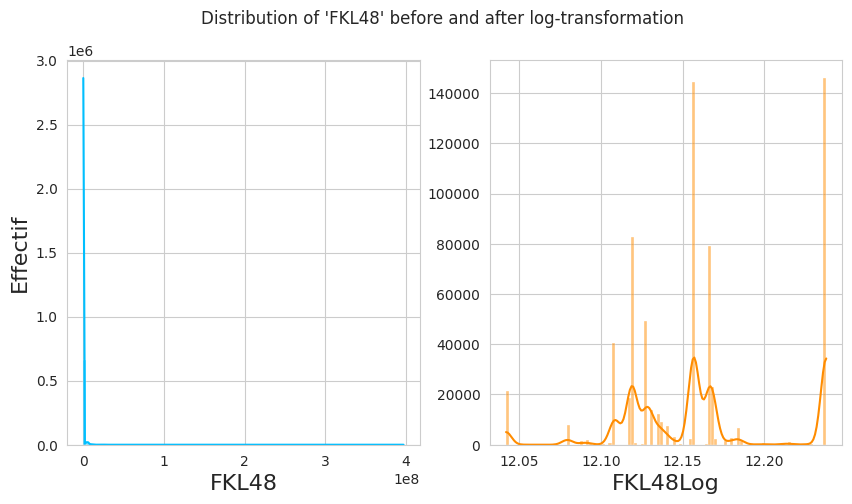

In [ ]:
# Log transformation of the target variable "SalePrice"
fkrtl_new["FKL48log"] = np.log(fkrtl_new.FKL48)

# Plot the distribution before and after transformation
fig, axes = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle("Distribution of 'FKL48' before and after log-transformation")

# before log transformation
p = sns.histplot(ax=axes[0], x=fkrtl_num["FKL48"],
                 kde=True, bins=100, color="deepskyblue")
p.set_xlabel("FKL48", fontsize=16)
p.set_ylabel("Effectif", fontsize=16)

# after log transformation
q = sns.histplot(ax=axes[1], x=fkrtl_new["FKL48log"],
                 kde=True, bins=100, color="darkorange")
q.set_xlabel("FKL48Log", fontsize=16)
q.set_ylabel("", fontsize=16)

In [ ]:
# Drop the original FKL48
fkrtl_new.drop("FKL48", axis=1, inplace=True)

### I.4.2 Split data into train and test set and Standardization

In [ ]:
# Extract the features (X) and the target (y)
# Features (X)
X = fkrtl_new.drop('FKL48log', axis=1)
print(X.shape)

# Target (y)
y = fkrtl_new.loc[:, "FKL48log"]
print(y.shape)

(686344, 125)
(686344,)


In [ ]:
# Split into X_train and X_test (by stratifying on y)
# Stratify on a continuous variable by splitting it in bins
# Create the bins.
bins = np.linspace(0, len(y), 150)
y_binned = np.digitize(y, bins)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    stratify=y_binned, shuffle=True)
print(f"X_train:{X_train.shape}\ny_train:{y_train.shape}")
print(f"\nX_test:{X_test.shape}\ny_test:{y_test.shape}")

X_train:(549075, 125)
y_train:(549075,)

X_test:(137269, 125)
y_test:(137269,)


In [ ]:
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train = std_scale.transform(X_train)
X_test = std_scale.transform(X_test)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

y_train = pd.DataFrame(y_train)
y_train = y_train.reset_index().drop('index', axis=1)
y_test = y_test.reset_index().drop('index', axis=1)

### I.4.3 Backward stepwise regression

In [ ]:
Selected_Features = []


def backward_regression(X, y, initial_list=[], threshold_in=0.01, threshold_out=0.05, verbose=True):
    """To select feature with Backward Stepwise Regression

    Args:
        X -- features values
        y -- target variable
        initial_list -- features header
        threshold_in -- pvalue threshold of features to keep
        threshold_out -- pvalue threshold of features to drop
        verbose -- true to produce lots of logging output

    Returns:
        list of selected features for modeling
    """
    included = list(X.columns)
    while True:
        changed = False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()  # null if pvalues is empty
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print(f"worst_feature : {worst_feature}, {worst_pval} ")
        if not changed:
            break
    Selected_Features.append(included)
    print(f"\nSelected Features:\n{Selected_Features[0]}")


# Application of the backward regression function on our training data
backward_regression(X_train, y_train)

worst_feature : FKL29_BUKAN RUJUKAN, 0.9858183512267937 
worst_feature : FKL05_DKI JAKARTA, 0.9918364159962098 
worst_feature : PSTV07_9.0, 0.9883139032740798 
worst_feature : FKL28_Klinik Pratama, 0.6765936628487821 
worst_feature : FKL31_regional 3, 0.9887450737623747 
worst_feature : FKL28_Dokter gigi, 0.9513695490369466 
worst_feature : FKL14_Rujuk, 0.9740529730747209 
worst_feature : FKL31_regional 4, 0.9359428868482239 
worst_feature : PSTV08_PBPU, 0.9528437550459599 
worst_feature : FKL29_PPK LAIN-LAIN, 0.8646812297071352 
worst_feature : FKL08_Rumah sakit, 0.797259060994973 
worst_feature : PSTV07_KELAS I, 0.5113034797374528 
worst_feature : PSTV12_KLINIK PRATAMA, 0.45488817357744604 
worst_feature : FKL29_KHUSUS TULANG, 0.49225168901116545 
worst_feature : FKL29_RS SWASTA SETARA TYPE A, 0.4763614333728384 
worst_feature : FKL05_SULAWESI BARAT, 0.4135913961309532 
worst_feature : FKL31_regional 5, 0.4524853661784126 
worst_feature : FKL12_Bukan pekerja, 0.4300210436949814 
wors

In [ ]:
# selected feature
Selected_Features = ['FKL08_Rumah sakit', 'FKL12_Bukan pekerja', 'FKL12_PBI APBN', 'FKL12_PBPU', 'FKL12_PPU', 'FKL13_Kelas 3', 'FKL14_Meninggal', 'FKL14_Pulang Paksa', 'FKL14_Sehat', 'FKL14_Tidak Tahu', 'FKL27_BUKAN RUJUKAN', 'FKL27_BUMN', 'FKL27_POLRI', 'FKL27_PemKab', 'FKL27_PemProv', 'FKL27_Swasta', 'FKL27_TNI AD', 'FKL27_TNI AL', 'FKL27_TNI AU', 'FKL27_Vertikal', 'FKL28_Klinik Utama', 'FKL28_Puskesmas', 'FKL31_regional 3', 'PSTV05_LAKI-LAKI', 'PSTV07_KELAS II', 'PSTV07_KELAS III', 'PSTV08_BUKAN PEKERJA', 'PSTV08_PBI APBD', 'PSTV08_PBI APBN', 'PSTV08_PBPU', 'PSTV12_DOKTER UMUM', 'PSTV12_KLINIK PRATAMA', 'PSTV17_MENINGGAL', 'PSTV17_TIDAK AKTIF', 'FKL05_ACEH', 'FKL05_BALI', 'FKL05_BANTEN', 'FKL05_BENGKULU', 'FKL05_DAERAH ISTIMEWA YOGYAKARTA', 'FKL05_DKI JAKARTA', 'FKL05_GORONTALO', 'FKL05_JAMBI', 'FKL05_JAWA BARAT', 'FKL05_JAWA TENGAH', 'FKL05_JAWA TIMUR', 'FKL05_KALIMANTAN BARAT', 'FKL05_KALIMANTAN SELATAN', 'FKL05_KALIMANTAN TENGAH', 'FKL05_KALIMANTAN TIMUR', 'FKL05_KALIMANTAN UTARA', 'FKL05_KEPULAUAN BANGKA BELITUNG', 'FKL05_KEPULAUAN RIAU', 'FKL05_LAMPUNG', 'FKL05_MALUKU', 'FKL05_MALUKU UTARA', 'FKL05_NUSA TENGGARA BARAT', 'FKL05_PAPUA BARAT', 'FKL05_RIAU', 'FKL05_SULAWESI SELATAN', 'FKL05_SULAWESI TENGAH', 'FKL05_SULAWESI TENGGARA', 'FKL05_SULAWESI UTARA', 'FKL05_SUMATERA BARAT', 'FKL05_SUMATERA SELATAN', 'FKL05_SUMATERA UTARA', 'FKL29_DOKTER PRAKTER PERORANGAN', 'FKL29_KHUSUS GIGI DAN MULUT', 'FKL29_KHUSUS IBU DAN ANAK', 'FKL29_KHUSUS JANTUNG', 'FKL29_KHUSUS JIWA', 'FKL29_KHUSUS LAIN', 'FKL29_KHUSUS MATA', 'FKL29_KHUSUS PARU', 'FKL29_KLINIK NON RAWAT INAP', 'FKL29_KLINIK RAWAT INAP', 'FKL29_NON PROVIDER GAWATDARURAT', 'FKL29_RS KELAS B', 'FKL29_RS KELAS C', 'FKL29_RS KELAS D', 'FKL29_RS KELAS D PRATAMA', 'FKL29_RS SWASTA SETARA TYPE B', 'FKL29_RS SWASTA SETARA TYPE C', 'FKL29_RS SWASTA SETARA TYPE D', 'FKL29_RS TNI POLRI KELAS II', 'FKL29_RS TNI POLRI KELAS III', 'FKL29_RS TNI POLRI KELAS IV', 'PSTV15', 'Age']

# Keep the selected features only
X_train = X_train.loc[:, Selected_Features]
X_test = X_test.loc[:, Selected_Features]

### I.4.4 Variance Inflation Factor

In [ ]:
# Here I calculate VIF for each feature
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    X_train.values, i) for i in range(X_train.shape[1])]

# VIF results in a table
vif["features"] = X_train.columns
vif.round(1)

,VIF Factor,features
0,1.00,FKL08_Rumah sakit
1,174.50,FKL12_Bukan pekerja
2,20.90,FKL12_PBI APBN
3,60.30,FKL12_PBPU
4,101.60,FKL12_PPU
...,...,...
83,1.80,FKL29_RS TNI POLRI KELAS II
84,2.80,FKL29_RS TNI POLRI KELAS III
85,2.50,FKL29_RS TNI POLRI KELAS IV
86,1.40,PSTV15


In [ ]:
# Select features with high VIF
high_vif_list = vif[vif["VIF Factor"] > 10]["features"].tolist()

if len(high_vif_list) == 0:
    # print empty list if low multicolinearity
    print(f"None of the features have a high multicollinearity")
else:
    # print list of features with high multicolinearity
    print(f"List of features with high multicollinearity: {high_vif_list}")

List of features with high multicollinearity: ['FKL12_Bukan pekerja', 'FKL12_PBI APBN', 'FKL12_PBPU', 'FKL12_PPU', 'FKL27_BUKAN RUJUKAN', 'FKL27_BUMN', 'FKL27_POLRI', 'FKL27_PemKab', 'FKL27_PemProv', 'FKL27_Swasta', 'FKL27_TNI AD', 'FKL27_TNI AL', 'FKL27_TNI AU', 'FKL27_Vertikal', 'FKL28_Puskesmas', 'FKL31_regional 3', 'PSTV08_BUKAN PEKERJA', 'PSTV08_PBI APBD', 'PSTV08_PBI APBN', 'PSTV08_PBPU', 'FKL05_ACEH', 'FKL05_JAWA TENGAH', 'FKL05_JAWA TIMUR', 'FKL05_SULAWESI SELATAN', 'FKL05_SUMATERA UTARA', 'FKL29_DOKTER PRAKTER PERORANGAN', 'FKL29_KLINIK NON RAWAT INAP', 'FKL29_KLINIK RAWAT INAP', 'FKL29_RS SWASTA SETARA TYPE C']


In [ ]:
high_vif_list = ['FKL12_Bukan pekerja', 'FKL12_PBI APBN', 'FKL12_PBPU', 'FKL12_PPU', 'FKL27_BUKAN RUJUKAN', 'FKL27_BUMN', 'FKL27_POLRI', 'FKL27_PemKab', 'FKL27_PemProv', 'FKL27_Swasta', 'FKL27_TNI AD', 'FKL27_TNI AL', 'FKL27_TNI AU', 'FKL27_Vertikal', 'FKL28_Puskesmas', 'FKL31_regional 3', 'PSTV08_BUKAN PEKERJA', 'PSTV08_PBI APBD', 'PSTV08_PBI APBN', 'PSTV08_PBPU', 'FKL05_ACEH', 'FKL05_JAWA TENGAH', 'FKL05_JAWA TIMUR', 'FKL05_SULAWESI SELATAN', 'FKL05_SUMATERA UTARA', 'FKL29_DOKTER PRAKTER PERORANGAN', 'FKL29_KLINIK NON RAWAT INAP', 'FKL29_KLINIK RAWAT INAP', 'FKL29_RS SWASTA SETARA TYPE C']

# Drop features with high multicollinearity from X_train and X_test
X_train.drop(high_vif_list, axis=1, inplace=True)
X_test.drop(high_vif_list, axis=1, inplace=True)

In [ ]:
X_train.shape

(549075, 59)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE

# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)

# Initialize RFE with the Random Forest model and the desired number of features to select
rfe = RFE(estimator=rf_model, n_features_to_select=10)

# Fit RFE to the training data
rfe.fit(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[rfe.support_]

# Print the selected features
print("Selected Features:", selected_features)

### I.4.5 Cook Distance

In [ ]:
X_constant = sm.add_constant(X_train)

model = sm.OLS(y_train, X_constant)
lr = model.fit()

# Cook distance
np.set_printoptions(suppress=True)

# Create an instance of influence
influence = lr.get_influence()

# Get Cook's distance for each observation
cooks = influence.cooks_distance

# Result as a dataframe
cook_df = pd.DataFrame({"Cook_Distance": cooks[0], "p_value": cooks[1]})
cook_df.head()

,Cook_Distance,p_value
0,-0.00,1.00
1,-0.00,1.00
2,0.00,1.00
3,-0.00,1.00
4,0.00,1.00


In [ ]:
# Remove the influential observation from X_train and y_train
influent_observation = cook_df[cook_df["p_value"] < 0.05].index.tolist()
print(f"Influential observations dropped: {influent_observation}")

# Drop these obsrevations
X_train = X_train.drop(X_train.index[influent_observation])
y_train = y_train.drop(y_train.index[influent_observation])

Influential observations dropped: []


## I.5 Models and metric selection

In [ ]:
import sklearn
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [ ]:
# Let's define a function for each metrics
# R²
def rsqr_score(test, pred):
    """Calculate R squared score

    Args:
        test -- test data
        pred -- predicted data

    Returns:
        R squared score
    """
    r2_ = r2_score(test, pred)
    return r2_


# RMSE
def rmse_score(test, pred):
    """Calculate Root Mean Square Error score

    Args:
        test -- test data
        pred -- predicted data

    Returns:
        Root Mean Square Error score
    """
    rmse_ = np.sqrt(mean_squared_error(test, pred))
    return rmse_


# Print the scores
def print_score(test, pred):
    """Print calculated score

    Args:
        test -- test data
        pred -- predicted data

    Returns:
        print the regressor name
        print the R squared score
        print Root Mean Square Error score
    """

    print(f"- Regressor: {regr.__class__.__name__}")
    print(f"R²: {rsqr_score(test, pred)}")
    print(f"RMSE: {rmse_score(test, pred)}\n")

In [ ]:
# Define regression models
ridge = Ridge()
lasso = Lasso(alpha=0.001)
elastic = ElasticNet(alpha=0.001)
svr = SVR()
rdf = RandomForestRegressor()
xgboost = XGBRegressor()
lgbm = LGBMRegressor()


# Train models on X_train and y_train
for regr in [ridge, lasso, elastic, svr, rdf, xgboost, lgbm]:
    # fit the corresponding model
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_test)
    # Print the defined metrics above for each classifier
    print_score(y_test, y_pred)

NameError: ignored